In [ ]:
!pip install keras-vis

!pip install tensorflow

!pip install tf-keras-vis tensorflow

In [3]:
%reload_ext autoreload
%autoreload 2

import tensorflow as tf

from tensorflow.keras.applications.vgg16 import VGG16 as Model
from tensorflow.keras.applications.vgg16 import preprocess_input

import numpy as np
from matplotlib import pyplot as plt
# %matplotlib inline
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras import backend as K
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize
from vis.utils import utils
from tensorflow.keras.applications.vgg16 import decode_predictions
import json

In [4]:
#utility function to show images
def display_imgs(images):
  subprot_args = {
   'nrows': 1,
   'ncols': 4,
   'figsize': (6, 3),
   'subplot_kw': {'xticks': [], 'yticks': []}
  }
  f, ax = plt.subplots(**subprot_args)
  for i in range(len(images)):
    ax[i].imshow(images[i])
  plt.tight_layout()
  plt.show()

In [ ]:
# Load model
model = Model(weights='imagenet', include_top=True)
model.summary()

img1 = load_img('/content/cat.jpg', target_size=(224, 224))
img2 = load_img('/content/dog.jpg', target_size=(224, 224))
img3 = load_img('/content/hen.jpg', target_size=(224, 224))
img4 = load_img('/content/tiger.jpg', target_size=(224, 224))

#plt.imshow(img1)
#plt.show()

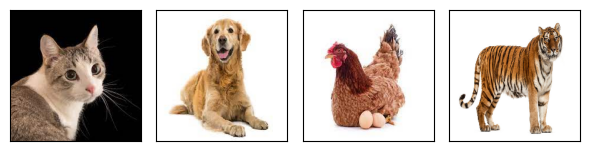

In [7]:
#create array of images
images = np.asarray([np.array(img1), np.array(img2), np.array(img3), np.array(img4)])

#show images
display_imgs(images)

In [8]:
#convert to numpy array for reshaping
img1 = img_to_array(img1)
img2 = img_to_array(img2)
img3 = img_to_array(img3)
img4 = img_to_array(img4)

#reshape to prepare for processing
img1 = img1.reshape(1,224,224,3)
img2 = img2.reshape(1,224,224,3)
img3 = img3.reshape(1,224,224,3)
img4 = img4.reshape(1,224,224,3)

#preprocess to prepare for input
img1 = preprocess_input(img1)
img2 = preprocess_input(img2)
img3 = preprocess_input(img3)
img4 = preprocess_input(img4)

In [9]:
# predictions with input images
yhat1 = model.predict(img1)
yhat2 = model.predict(img2)
yhat3 = model.predict(img3)
yhat4 = model.predict(img4)

#decode predictions
label1 = decode_predictions(yhat1)
label2 = decode_predictions(yhat2)
label3 = decode_predictions(yhat3)
label4 = decode_predictions(yhat4)

35363/35363 [==============================] - 0s 0us/step


In [10]:
# extract top most prediction for each input
label1 = label1[0][0]
label2 = label2[0][0]
label3 = label3[0][0]
label4 = label4[0][0]

#plt.imshow(image1)
print('%s (%.2f%%)' % (label1[1], label1[2]*100))
#plt.imshow(image2)
print('%s (%.2f%%)' % (label2[1], label2[2]*100))
#plt.imshow(image3)
print('%s (%.2f%%)' % (label3[1], label3[2]*100))
#plt.imshow(image4)
print('%s (%.2f%%)' % (label4[1], label4[2]*100))

Egyptian_cat (56.52%)
golden_retriever (98.49%)
hen (64.33%)
tiger (90.47%)


In [11]:
#download class file
!wget "https://raw.githubusercontent.com/raghakot/keras-vis/master/resources/imagenet_class_index.json"

--2023-09-01 10:05:32--  https://raw.githubusercontent.com/raghakot/keras-vis/master/resources/imagenet_class_index.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35363 (35K) [text/plain]
Saving to: ‘imagenet_class_index.json’

imagenet_class_inde 100%[===================>]  34.53K  --.-KB/s    in 0s      

2023-09-01 10:05:33 (109 MB/s) - ‘imagenet_class_index.json’ saved [35363/35363]



In [12]:
#prepare 1000 classes
CLASS_INDEX = json.load(open("imagenet_class_index.json"))
classlabel = []
for i_dict in range(len(CLASS_INDEX)):
    classlabel.append(CLASS_INDEX[str(i_dict)][1])
print("N of class={}".format(len(classlabel)))

N of class=1000


In [14]:
#Top 5 classes predicted
class_idxs_sorted1 = np.argsort(yhat1.flatten())[::-1]
class_idxs_sorted2 = np.argsort(yhat2.flatten())[::-1]
class_idxs_sorted3 = np.argsort(yhat3.flatten())[::-1]
class_idxs_sorted4 = np.argsort(yhat4.flatten())[::-1]

topNclass         = 5

print('\nfirst image\n')
for i, idx in enumerate(class_idxs_sorted1[:topNclass]):
    print("Top {} predicted class:     Pr(Class={:18} [index={}])={:5.3f}".format(
          i + 1,classlabel[idx],idx,yhat1[0,idx]))

print('\nsecond image\n')
for i, idx in enumerate(class_idxs_sorted2[:topNclass]):
    print("Top {} predicted class:     Pr(Class={:18} [index={}])={:5.3f}".format(
          i + 1,classlabel[idx],idx,yhat2[0,idx]))

print('\nthird image\n')
for i, idx in enumerate(class_idxs_sorted3[:topNclass]):
    print("Top {} predicted class:     Pr(Class={:18} [index={}])={:5.3f}".format(
          i + 1,classlabel[idx],idx,yhat3[0,idx]))

print('\nFourth image\n')
for i, idx in enumerate(class_idxs_sorted4[:topNclass]):
    print("Top {} predicted class:     Pr(Class={:18} [index={}])={:5.3f}".format(
          i + 1,classlabel[idx],idx,yhat4[0,idx]))


first image

Top 1 predicted class:     Pr(Class=Egyptian_cat       [index=285])=0.565
Top 2 predicted class:     Pr(Class=tabby              [index=281])=0.273
Top 3 predicted class:     Pr(Class=tiger_cat          [index=282])=0.077
Top 4 predicted class:     Pr(Class=lynx               [index=287])=0.009
Top 5 predicted class:     Pr(Class=carton             [index=478])=0.007

second image

Top 1 predicted class:     Pr(Class=golden_retriever   [index=207])=0.985
Top 2 predicted class:     Pr(Class=Labrador_retriever [index=208])=0.003
Top 3 predicted class:     Pr(Class=Sussex_spaniel     [index=220])=0.002
Top 4 predicted class:     Pr(Class=cocker_spaniel     [index=219])=0.002
Top 5 predicted class:     Pr(Class=clumber            [index=216])=0.001

third image

Top 1 predicted class:     Pr(Class=hen                [index=8])=0.643
Top 2 predicted class:     Pr(Class=cock               [index=7])=0.354
Top 3 predicted class:     Pr(Class=partridge          [index=86])=0.002


In [15]:
# swap softmax layer with linear layer
layer_idx = utils.find_layer_idx(model, 'predictions')
model.layers[-1].activation = tf.keras.activations.linear
model = utils.apply_modifications(model)

In [16]:
#get the input image index
from tf_keras_vis.utils.scores import CategoricalScore
#cat - 281, dog -235 , hen -8, tiger - 292
score = CategoricalScore([281, 235, 8 , 292])

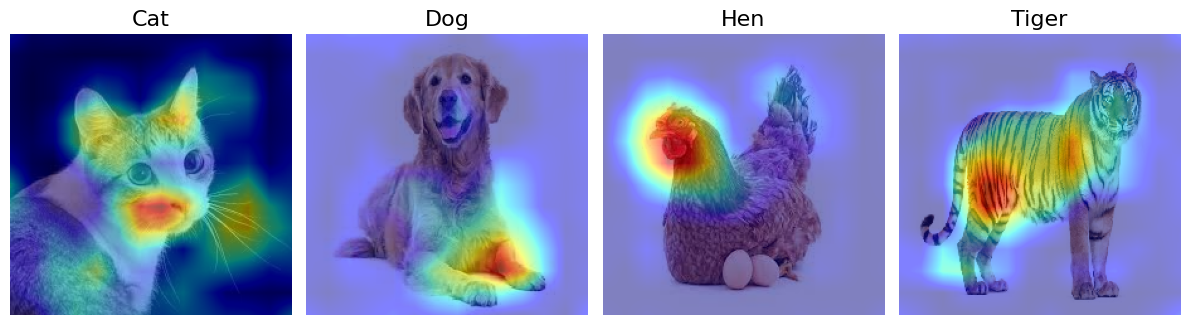

In [17]:
from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam

input_classes = ['Cat', 'Dog', 'Hen', 'Tiger']

input_images = preprocess_input(images)

# Create Gradcam object
gradcam = Gradcam(model,
                  clone=True)

# Generate heatmap with GradCAM
cam = gradcam(score,
              input_images,
              penultimate_layer=-1)

#show generated images
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
for i, img_class in enumerate(input_classes):
    heatmap = np.uint8(cm.jet(cam[i])[..., :4] * 255)
    ax[i].set_title(img_class, fontsize=16)
    ax[i].imshow(images[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5) # overlay
    ax[i].axis('off')
plt.tight_layout()
plt.show()

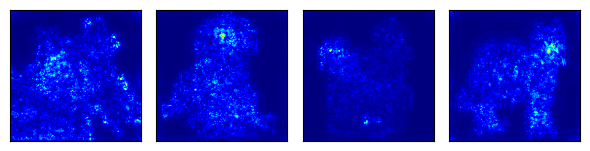

In [18]:
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize

#Create Saliency object
saliency = Saliency(model, clone=False)

# Generate saliency map
saliency_map = saliency(score, input_images)
saliency_map = normalize(saliency_map)

subprot_args = {
   'nrows': 1,
   'ncols': 4,
   'figsize': (6, 3),
   'subplot_kw': {'xticks': [], 'yticks': []}
}
f, ax = plt.subplots(**subprot_args)
for i in range(len(saliency_map)):
   ax[i].imshow(saliency_map[i], cmap='jet')
plt.tight_layout()
plt.show()

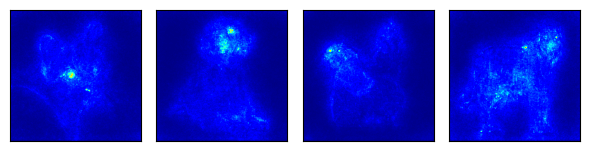

In [19]:
saliency_map = saliency(score, input_images, smooth_samples=20)
saliency_map = normalize(saliency_map)

f, ax = plt.subplots(**subprot_args)
for i in range(len(saliency_map)):
   ax[i].imshow(saliency_map[i], cmap='jet')
plt.tight_layout()
plt.show()